In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vectors = pd.read_csv('vec.csv')

In [23]:
vector_coords = vectors[(vectors.type == "vector") & (vectors.name == "posX:vector")]

In [36]:
x = [float(n) for n in vector_coords.iloc[[0]].vectime.values[0].split(' ')]

In [45]:
y = []

for t in x:
    tmp = 0
    for v in range(len(vector_coords)):
        times = [float(n) for n in vector_coords.iloc[[v]].vectime.values[0].split(' ')]
        if t in times:
            tmp += 1
    y.append(tmp)

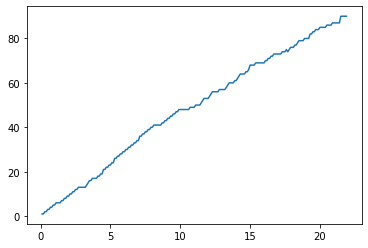

In [48]:
plt.plot(x,y)

In [53]:
car0 = vectors[(vectors.type == "vector") & (vectors.name == "allDetectedCars")].iloc[[0]]

In [58]:
x = [float(n) for n in car0.vectime.values[0].split(' ')]

In [60]:
y = [float(n) for n in car0.vecvalue.values[0].split(' ')]

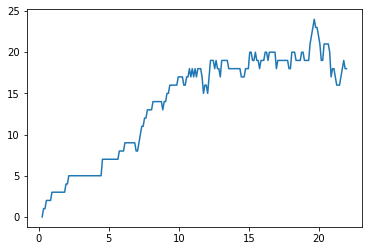

In [61]:
plt.plot(x,y)